In [1]:
from pycaret.datasets import get_data
import pandas as pd

In [2]:
dateset = pd.read_csv("csv/fhwhole1.csv")

In [3]:
len(dateset.columns)

40

In [4]:
dateset.columns

Index(['负荷', 'A、B层摆动喷嘴阀位 ', 'C、D层摆动喷嘴阀位  ', 'E、F层摆动喷嘴阀位 ', '空预器入口烟气温度1',
       'SCR IN O2 ', 'SOFA摆角', 'CCOFAI', 'CCOFAII', 'SOFAI', 'SOFAII',
       'SOFAIII', 'SOFAIV', 'SOFAV', 'SOFAVI', '水分', '热值', '灰分', 'A磨煤量',
       'B磨煤量', 'C磨煤量', 'D磨煤量', 'E磨煤量', 'F磨煤量', 'A磨一次风量', 'B磨一次风量', 'C磨一次风量',
       'D磨一次风量', 'E磨一次风量', 'F磨一次风量', '风箱差压', '主给水', '总燃料量', '磨煤机A出口风粉温度',
       '磨煤机B出口风粉温度', '磨煤机C出口风粉温度', '磨煤机D出口风粉温度', '磨煤机E出口风粉温度', '磨煤机F出口风粉温度',
       '飞灰含碳量'],
      dtype='object')

In [5]:
recols = []
for i in range (len(dateset.columns)):
    recols.append(f"features{i+1}")

In [6]:
dateset.columns = recols

In [8]:
dateset.columns

Index(['features1', 'features2', 'features3', 'features4', 'features5',
       'features6', 'features7', 'features8', 'features9', 'features10',
       'features11', 'features12', 'features13', 'features14', 'features15',
       'features16', 'features17', 'features18', 'features19', 'features20',
       'features21', 'features22', 'features23', 'features24', 'features25',
       'features26', 'features27', 'features28', 'features29', 'features30',
       'features31', 'features32', 'features33', 'features34', 'features35',
       'features36', 'features37', 'features38', 'features39', 'features40'],
      dtype='object')

In [9]:
dateset.features1

0      628.49
1      551.11
2      469.09
3      642.87
4      679.60
        ...  
217    635.12
218    583.56
219    486.03
220    590.82
221    649.35
Name: features1, Length: 222, dtype: float64

In [10]:
from pycaret.regression  import *

In [11]:
reg1 = setup(dateset, target = 'features40',train_size = 0.8)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,842
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(222, 40)"
4,Missing Values,False
5,Numeric Features,39
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [12]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Least Angle Regression,0.275600,0.140400,0.354300,-0.139200,0.136700,0.193100
1,Lasso Regression,0.277400,0.143000,0.357400,-0.153800,0.137900,0.194800
2,Elastic Net,0.278900,0.143900,0.358800,-0.164000,0.138500,0.196300
3,Bayesian Ridge,0.278200,0.143100,0.357800,-0.164100,0.138200,0.195700
4,Support Vector Machine,0.277500,0.142300,0.357400,-0.187300,0.137500,0.191900
5,Orthogonal Matching Pursuit,0.288500,0.151100,0.368900,-0.261100,0.142400,0.202500
6,CatBoost Regressor,0.290200,0.151300,0.370200,-0.282400,0.141500,0.200800
7,Extra Trees Regressor,0.286100,0.148200,0.369100,-0.339900,0.141200,0.199600
8,Random Forest,0.296100,0.157000,0.377700,-0.344700,0.145000,0.208000
9,K Neighbors Regressor,0.295800,0.154800,0.379300,-0.428500,0.146800,0.210800


In [12]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.3995,3.1968,1.7880,0.9860,0.0396,0.0252
1,3.0327,25.3186,5.0318,0.9471,0.1372,0.0849
2,1.2195,3.0499,1.7464,0.9850,0.0290,0.0185
3,1.9559,11.6907,3.4192,0.9532,0.0744,0.0368
4,2.5814,19.1529,4.3764,0.9501,0.0641,0.0416
5,1.4636,4.2392,2.0589,0.9869,0.0428,0.0282
6,1.3014,3.3793,1.8383,0.9924,0.0856,0.0418
7,1.6369,6.1352,2.4769,0.9806,0.0375,0.0261
8,1.9348,6.8226,2.6120,0.9862,0.0979,0.0583
9,1.0986,2.8090,1.6760,0.9940,0.0384,0.0220


In [13]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.4778,17.1529,4.1416,0.9249,0.0640,0.0543
1,5.8916,76.6239,8.7535,0.8399,0.2179,0.1604
2,3.4967,21.6654,4.6546,0.8933,0.0770,0.0567
3,5.0063,53.7769,7.3333,0.7849,0.1289,0.0822
4,4.1177,26.9500,5.1913,0.9297,0.0847,0.0680
5,3.8932,22.0379,4.6945,0.9316,0.0934,0.0744
6,4.4275,39.9016,6.3168,0.9098,0.1832,0.1209
7,4.6780,30.1750,5.4932,0.9046,0.0952,0.0810
8,5.1525,45.1262,6.7176,0.9087,0.1923,0.1397
9,4.1869,30.4917,5.5219,0.9354,0.1785,0.1195


In [14]:
tuned_et = tune_model('et', n_iter = 50, optimize = 'mae')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.7517,4.1740,2.0430,0.9817,0.0331,0.0273
1,4.6413,54.1330,7.3575,0.8869,0.1921,0.1324
2,2.0569,8.5658,2.9267,0.9578,0.0496,0.0323
3,3.1569,26.1492,5.1136,0.8954,0.1067,0.0587
4,3.2626,20.7467,4.5549,0.9459,0.1085,0.0706
5,2.4698,13.8266,3.7184,0.9571,0.0835,0.0519
6,1.9395,8.5881,2.9305,0.9806,0.1518,0.0738
7,2.7317,14.5163,3.8100,0.9541,0.0646,0.0466
8,3.0839,19.3987,4.4044,0.9608,0.1714,0.1050
9,1.7881,8.4707,2.9105,0.9821,0.0766,0.0445


In [19]:
tuned_et = tune_model('et',fold =20, n_iter = 50, optimize = 'mae', ensemble=True, method ="Boosting")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.9123,6.0713,2.4640,0.9725,0.0409,0.0304
1,1.4923,3.1958,1.7877,0.9863,0.0287,0.0236
2,5.7188,72.7072,8.5269,0.8438,0.2234,0.1700
3,2.2855,12.2925,3.5061,0.9702,0.1033,0.0577
4,2.1518,10.3964,3.2243,0.9607,0.0589,0.0363
5,1.3441,2.6139,1.6168,0.9814,0.0231,0.0191
6,1.4609,4.4382,2.1067,0.9644,0.0368,0.0230
7,3.5108,25.3152,5.0314,0.9325,0.1147,0.0710
8,2.2905,15.3293,3.9153,0.9255,0.0620,0.0374
9,3.2982,15.9832,3.9979,0.9714,0.1038,0.0776


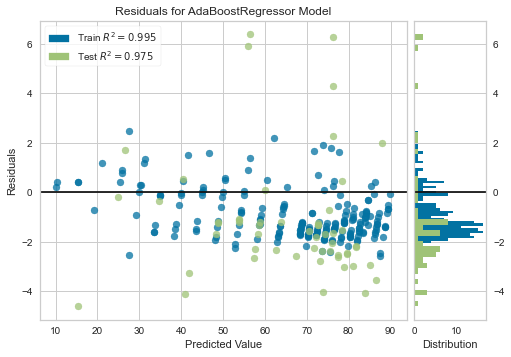

In [20]:
plot_model(tuned_et)

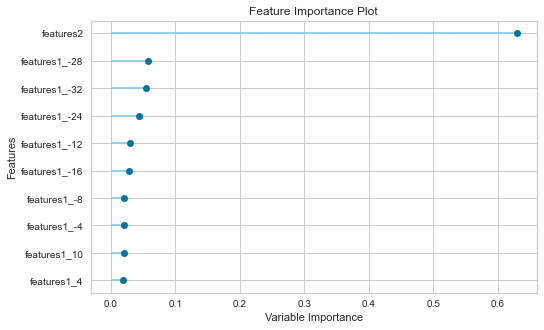

In [21]:
plot_model(tuned_et, plot='feature')

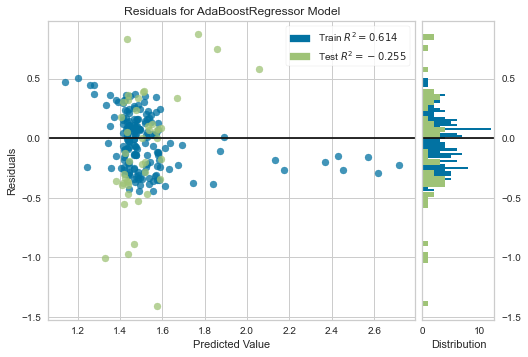

In [38]:
plot_model(tuned_ada)

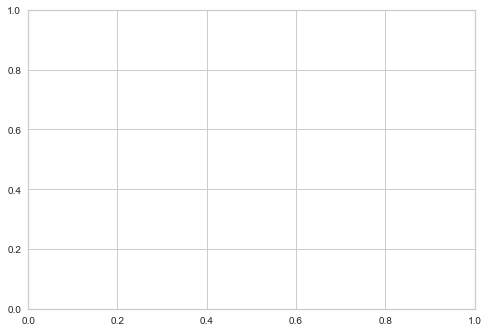

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [45]:
evaluate_model(tuned_lightgbm)

In [20]:
exp_reg102 = setup(data = dateset, target = 'features40', session_id=123,
                  normalize = True, transformation = True, transform_target = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
                  bin_numeric_features = ['Carat Weight']) 

SystemExit: (Value Error): Column type forced is either target column or doesn't exist in the dataset.